# HITANSH AGARWAL
### REGISTRATION NO.: 230957218
### ROLL NO.: 73

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso

## Exercise 1

#### Download fuel consumption dataset "FuelConsumption.csv", which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions.  
#### • Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size. 
#### • Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value. 
#### • Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best.

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().count() #Just to clean the data

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

In [4]:
# Question 1
df_selected = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df_selected

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [5]:
# Splitting the entire dataset into 2 data set i.e. train and test data set (2 csv files)
X = df_selected[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = df_selected['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
# Making 2 csv files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
print("Train and test datasets have been saved as 'train_data.csv' and 'test_data.csv'.")

Train and test datasets have been saved as 'train_data.csv' and 'test_data.csv'.


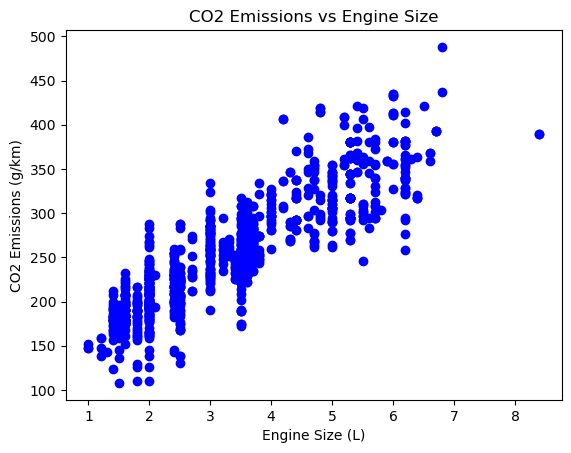

The above plot is for the entire data set!!


In [6]:
plt.scatter(df_selected['ENGINESIZE'], df_selected['CO2EMISSIONS'], color='blue')
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()
print("The above plot is for the entire data set!!")

In [7]:
train_data = pd.read_csv("train_data.csv")
train_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,12.3,283
1,3.6,6,11.1,255
2,5.4,8,18.3,421
3,3.5,6,10.0,230
4,3.6,6,15.7,251


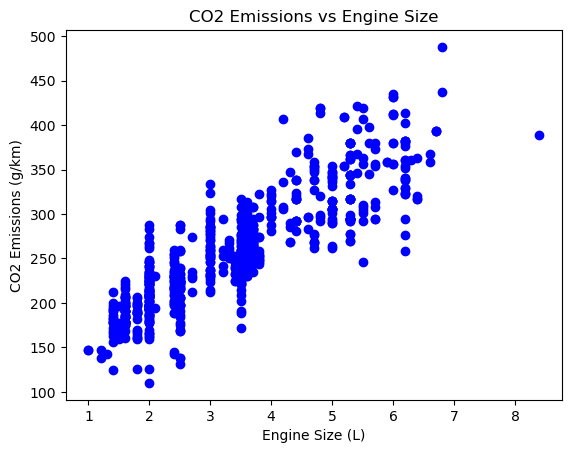

In [8]:
plt.scatter(train_data['ENGINESIZE'], train_data['CO2EMISSIONS'], color='blue')
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

In [9]:
X_train = train_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_train = train_data['CO2EMISSIONS']
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train_new[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']], y_train_new)

LinearRegression()

In [11]:
y_pred_val_linear = linear_model.predict(X_val)

In [12]:
mae_linear = mean_absolute_error(y_val, y_pred_val_linear)
mse_linear = mean_squared_error(y_val, y_pred_val_linear)
r2_linear = r2_score(y_val, y_pred_val_linear)

print("Linear Regression Evaluation on Validation Set:")
print(f"MAE: {mae_linear:.3f}")
print(f"MSE: {mse_linear:.3f}")
print(f"R2: {r2_linear:.3f}")

Linear Regression Evaluation on Validation Set:
MAE: 16.326
MSE: 542.829
R2: 0.859


In [13]:
def evaluate_polynomial_regression(degree, X_train_new, y_train_new, X_val, y_val):
    poly = PolynomialFeatures(degree=degree)
    
    
    X_poly_train_new = poly.fit_transform(X_train_new)
    X_poly_val = poly.transform(X_val)
    
   
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train_new, y_train_new)
    
   
    y_pred_val_poly = poly_model.predict(X_poly_val)
    
    plt.figure(figsize=(12, 8))
    
    
    sns.regplot(x=X_val['ENGINESIZE'], y=y_val, scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'label': f'Poly degree {degree}'}, order=degree)
    
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.legend()
    plt.show()
    
    mae_poly = mean_absolute_error(y_val, y_pred_val_poly)
    mse_poly = mean_squared_error(y_val, y_pred_val_poly)
    r2_poly = r2_score(y_val, y_pred_val_poly)
    
    
    rss_poly = ((y_val - y_pred_val_poly) ** 2).sum()
    
    return mae_poly, mse_poly, r2_poly, rss_poly


Evaluating Polynomial Regression with Degree 3:


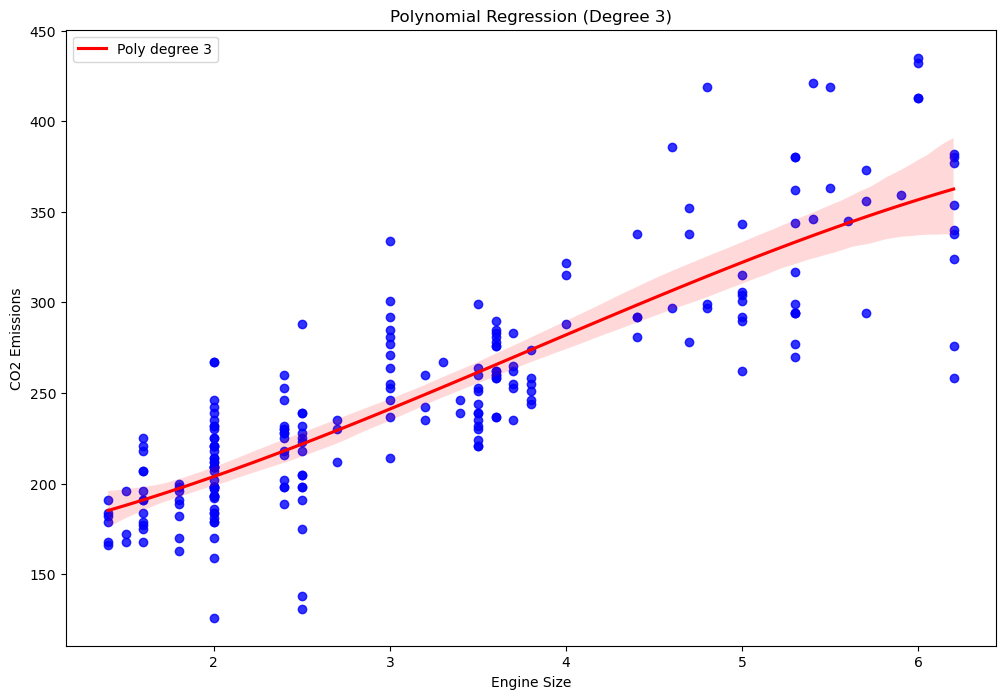

Degree 3 - MAE: 11.594
Degree 3 - MSE: 383.424
Degree 3 - R2: 0.900
Degree 3 - RSS: 85886.964

Evaluating Polynomial Regression with Degree 4:


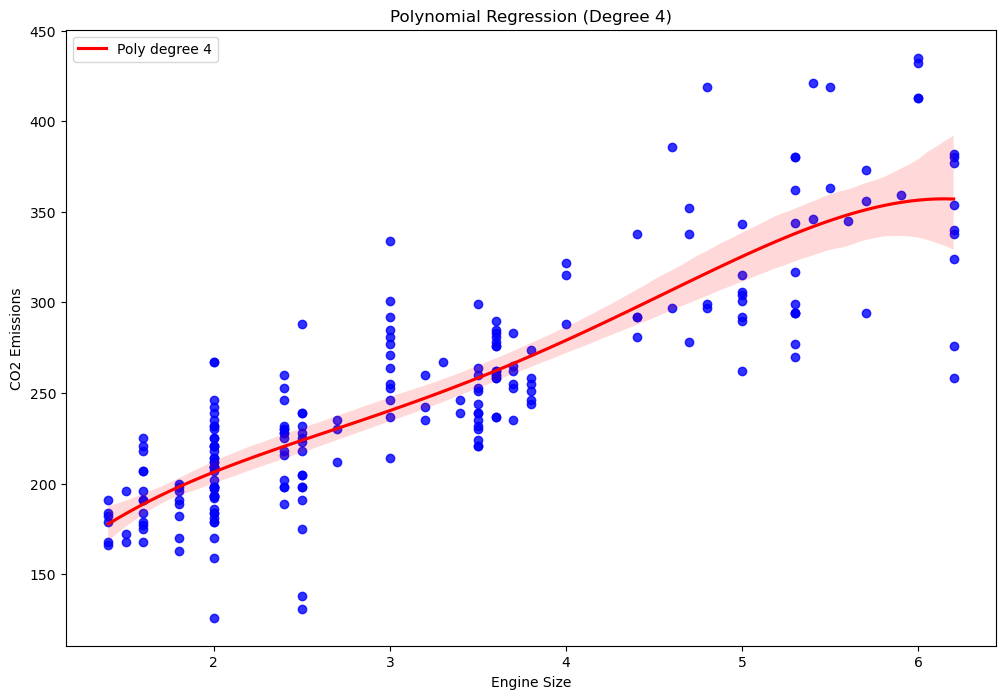

Degree 4 - MAE: 10.474
Degree 4 - MSE: 390.630
Degree 4 - R2: 0.898
Degree 4 - RSS: 87501.018

Evaluating Polynomial Regression with Degree 5:


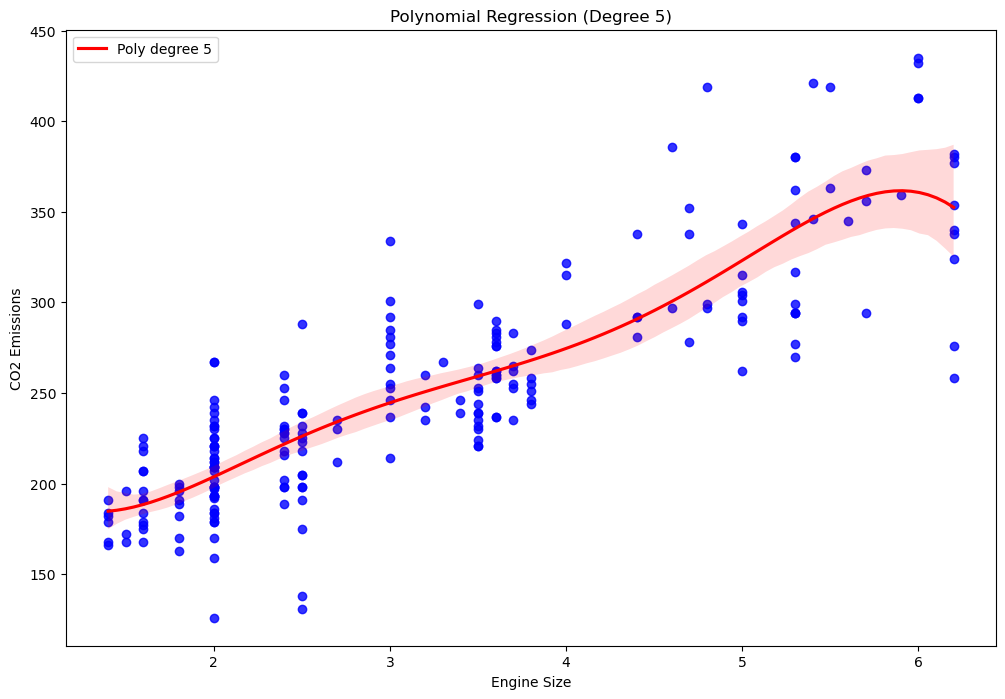

Degree 5 - MAE: 11.913
Degree 5 - MSE: 592.461
Degree 5 - R2: 0.846
Degree 5 - RSS: 132711.325


In [14]:
for degree in [3, 4, 5]:
    print(f"\nEvaluating Polynomial Regression with Degree {degree}:")
    mae_poly, mse_poly, r2_poly, rss_poly = evaluate_polynomial_regression(degree, X_train_new, y_train_new, X_val, y_val)
    
    print(f"Degree {degree} - MAE: {mae_poly:.3f}")
    print(f"Degree {degree} - MSE: {mse_poly:.3f}")
    print(f"Degree {degree} - R2: {r2_poly:.3f}")
    print(f"Degree {degree} - RSS: {rss_poly:.3f}")

In [15]:
def plot_3d_polynomial_regression(degree, X_train_new, y_train_new, X_val, y_val):
    
    poly = PolynomialFeatures(degree=degree)
    X_poly_train_new = poly.fit_transform(X_train_new[['ENGINESIZE', 'CYLINDERS']])  # Two features for 3D
    X_poly_val = poly.transform(X_val[['ENGINESIZE', 'CYLINDERS']])

    poly_model = LinearRegression()
    poly_model.fit(X_poly_train_new, y_train_new)
    
    
    y_pred_val_poly = poly_model.predict(X_poly_val)
    
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    
    ax.scatter(X_val['ENGINESIZE'], X_val['CYLINDERS'], y_val, color='blue', label='Actual data')

    
    ax.scatter(X_val['ENGINESIZE'], X_val['CYLINDERS'], y_pred_val_poly, color='red', label=f'Predicted (Degree {degree})')

    ax.set_title(f'Polynomial Regression (Degree {degree}) in 3D')
    ax.set_xlabel('Engine Size')
    ax.set_ylabel('Cylinders')
    ax.set_zlabel('CO2 Emissions')
    ax.legend()
    plt.show()

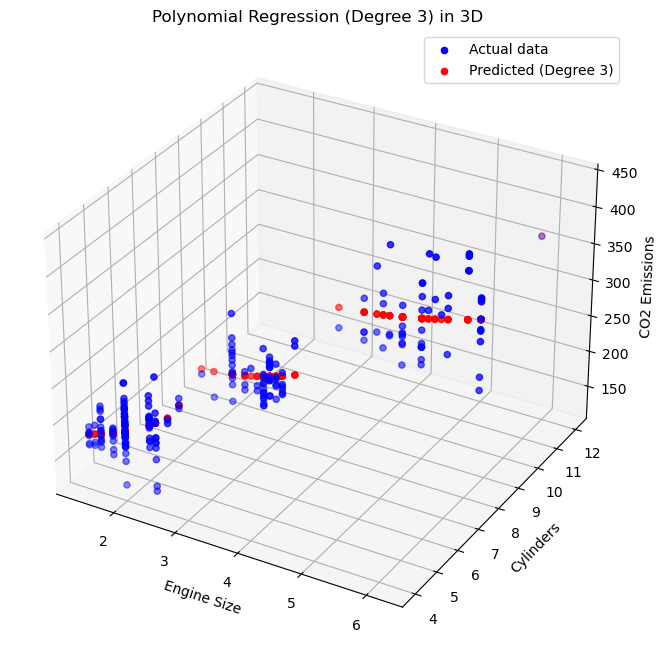

In [16]:
plot_3d_polynomial_regression(3, X_train_new, y_train_new, X_val, y_val)

In [17]:
test_data = pd.read_csv('test_data.csv')

In [18]:
X_test_new = test_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_test_new = test_data['CO2EMISSIONS']

In [35]:
y_pred_test_linear = linear_model.predict(X_test_new)
print(y_pred_test_linear)

[303.59974214 241.50546125 272.17681226 235.66064814 203.56278161
 245.80209415 303.52309993 283.3063102  309.87247891 306.28894884
 286.92800646 392.68811541 252.74976758 251.64690726 262.03536625
 255.33470581 209.02837714 250.9719706  189.66743476 308.76961858
 319.09197528 204.91265492 256.43756613 249.37508431 261.47523799
 196.61510819 204.48473125 185.97963621 310.18559419 249.06196903
 389.22625001 203.62888391 204.91265492 327.38952202 238.42649706
 287.9265983  277.89996069 397.27678376 198.95303343 204.79784653
 176.76013984 186.90158585 186.40755988 209.40759471 279.61851165
 198.88693113 244.88014452 258.70938908 192.49938596 363.04298251
 316.52443326 277.70851008 210.93837871 267.81407706 264.2410869
 316.14521568 387.13533775 323.58691508 191.57743633 278.51565133
 301.87065126 271.14005423 290.8733579  254.65976915 192.43328367
 246.79014609 185.48561024 301.08090621 254.09964089 263.20432887
 346.7504644  196.18718451 259.02250435 207.25058016 212.78227798
 290.615805

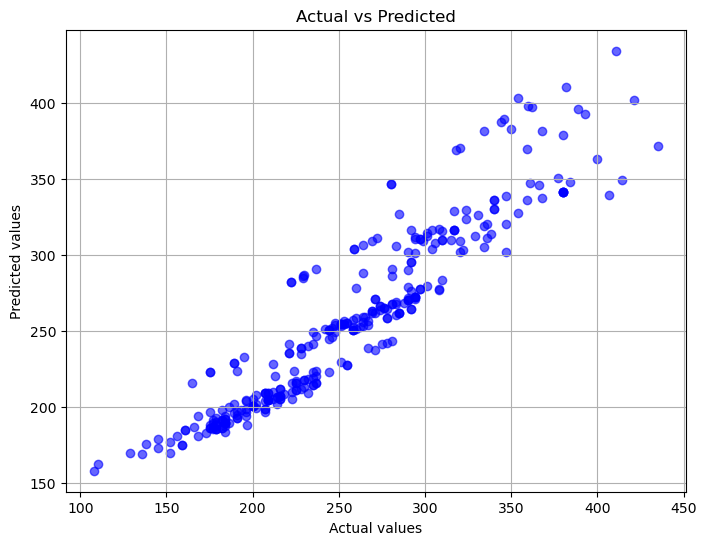

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_new, y_pred_test_linear, color='blue', alpha=0.6)
#plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new, y_test_new.max()], color='red', lw=2, linestyle='--')  # The perfect line (y = x)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [21]:
mae_linear = mean_absolute_error(y_test_new, y_pred_test_linear)
mse_linear = mean_squared_error(y_test_new, y_pred_test_linear)
r2_linear = r2_score(y_test_new, y_pred_test_linear)
rss_linear = ((y_test_new - y_pred_test_linear) ** 2).sum()

print("Linear Regression Model Metrics:")
print(f"MAE: {mae_linear:.3f}")
print(f"MSE: {mse_linear:.3f}")
print(f"R2: {r2_linear:.3f}")
print(f"RSS: {rss_linear:.3f}")

Linear Regression Model Metrics:
MAE: 16.650
MSE: 501.964
R2: 0.876
RSS: 161130.473


In [22]:
def evaluate_polynomial_regression1(degree, X_train_new, y_train_new, X_test_new, y_test_new):
    poly = PolynomialFeatures(degree=degree)
    
    X_poly_train_new = poly.fit_transform(X_train_new[['ENGINESIZE']])
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train_new, y_train_new)
    
   
    X_poly_test_new = poly.transform(X_test_new[['ENGINESIZE']])
    y_pred_poly_test = poly_model.predict(X_poly_test_new)
    plt.figure(figsize=(12, 8))
    
    
    sns.regplot(x=X_val['ENGINESIZE'], y=y_val, scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'label': f'Poly degree {degree}'}, order=degree)
    
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.legend()
    plt.show()
    
    
    mae_poly = mean_absolute_error(y_test_new, y_pred_poly_test)
    mse_poly = mean_squared_error(y_test_new, y_pred_poly_test)
    r2_poly = r2_score(y_test_new, y_pred_poly_test)
    rss_poly = ((y_test_new - y_pred_poly_test) ** 2).sum()
    
    
    return poly_model, mae_poly, mse_poly, r2_poly, rss_poly, y_pred_poly_test


Evaluating Polynomial Regression with Degree 3:


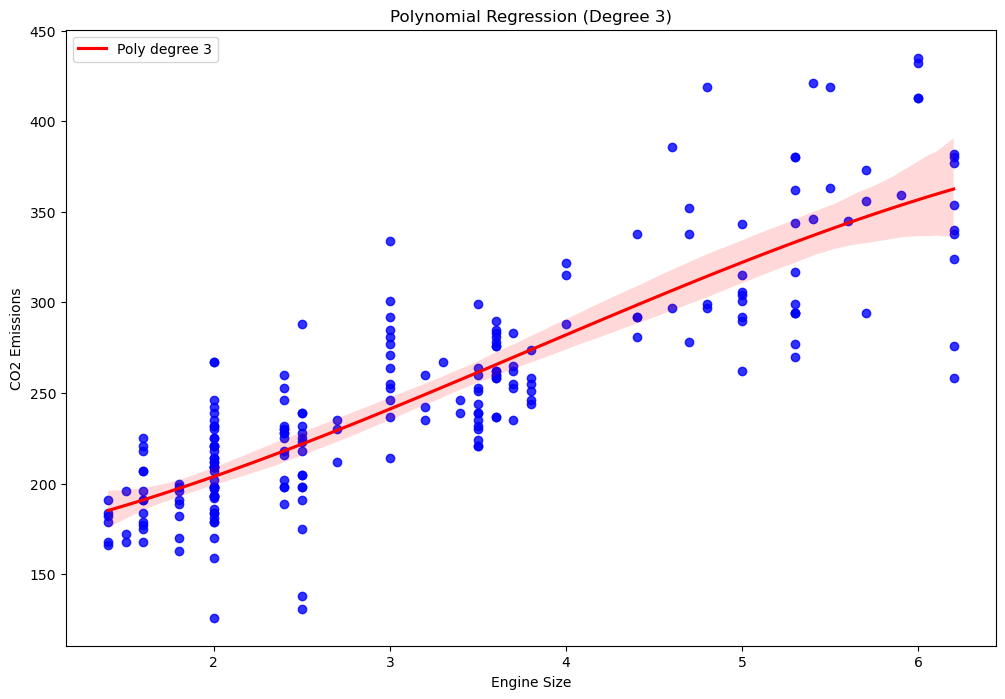

Degree 3 - MAE: 22.762
Degree 3 - MSE: 876.822
Degree 3 - R2: 0.783
Degree 3 - RSS: 281459.828

Evaluating Polynomial Regression with Degree 4:


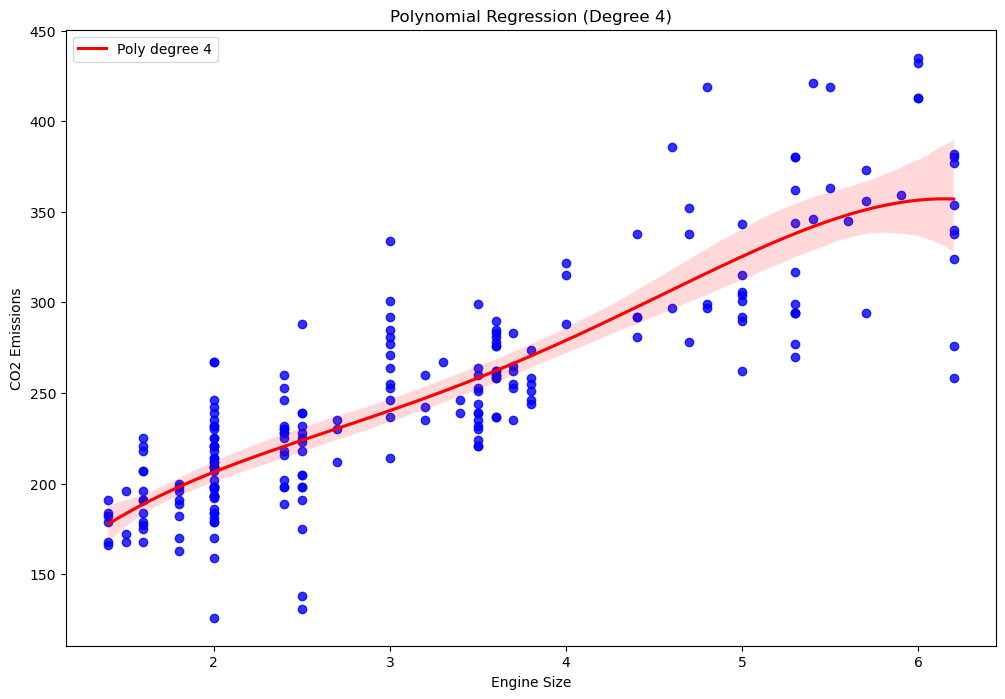

Degree 4 - MAE: 22.716
Degree 4 - MSE: 878.593
Degree 4 - R2: 0.782
Degree 4 - RSS: 282028.414

Evaluating Polynomial Regression with Degree 5:


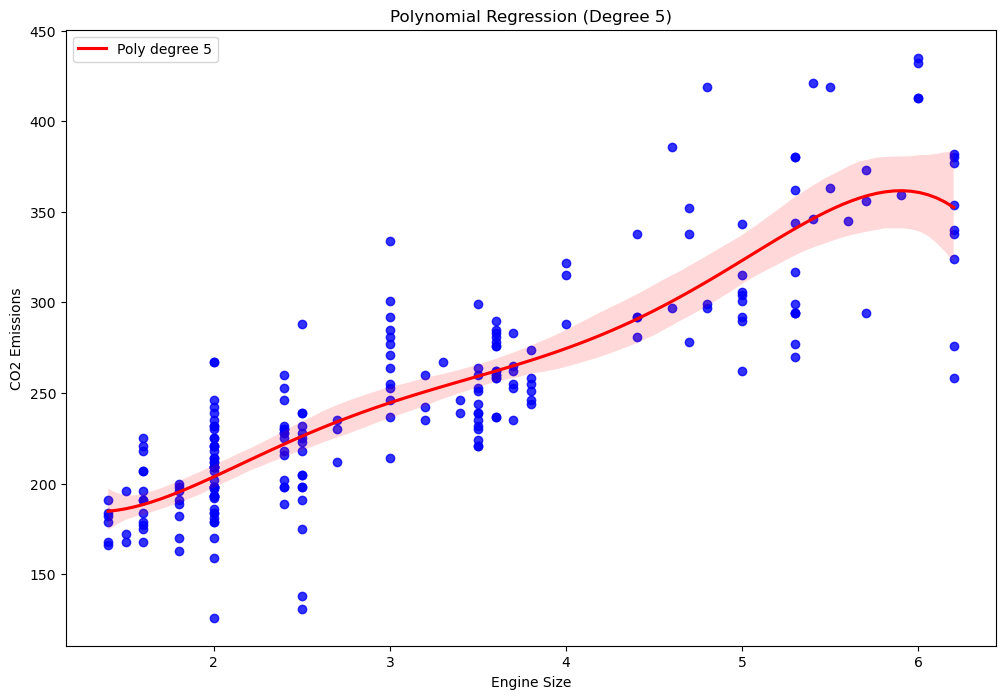

Degree 5 - MAE: 22.806
Degree 5 - MSE: 880.439
Degree 5 - R2: 0.782
Degree 5 - RSS: 282620.942


In [23]:
polynomial_models = {}
predictions = {}
for degree in [3, 4, 5]:
    print(f"\nEvaluating Polynomial Regression with Degree {degree}:")
    poly_model, mae_poly, mse_poly, r2_poly, rss_poly, y_pred_poly_test = evaluate_polynomial_regression1(degree, X_train_new, y_train_new, X_test_new, y_test_new)
    
    polynomial_models[degree] = poly_model
    predictions[degree] = y_pred_poly_test
    print(f"Degree {degree} - MAE: {mae_poly:.3f}")
    print(f"Degree {degree} - MSE: {mse_poly:.3f}")
    print(f"Degree {degree} - R2: {r2_poly:.3f}")
    print(f"Degree {degree} - RSS: {rss_poly:.3f}")

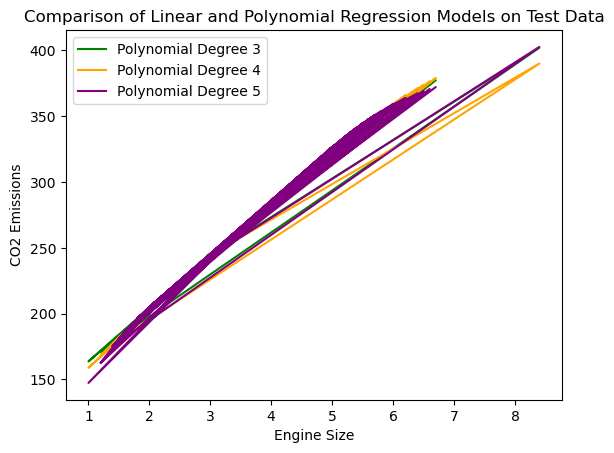

In [24]:
colors = ['green', 'orange', 'purple']
for degree, y_pred_poly_test in predictions.items():
    plt.plot(X_test_new['ENGINESIZE'], y_pred_poly_test, label=f'Polynomial Degree {degree}', color=colors[degree - 3])

plt.title('Comparison of Linear and Polynomial Regression Models on Test Data')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [25]:
print("The linear regression model outperforms all polynomial models based on key metrics (MAE, MSE, R², and RSS), offering better predictive accuracy and lower error. The polynomial models (degrees 3, 4, and 5) show slightly better flexibility but result in higher errors, indicating overfitting. Among the polynomial degrees, degree 3 provides the best balance with the lowest MAE and MSE. However, the overall best model remains the linear regression due to its superior performance across all metrics.")

The linear regression model outperforms all polynomial models based on key metrics (MAE, MSE, R², and RSS), offering better predictive accuracy and lower error. The polynomial models (degrees 3, 4, and 5) show slightly better flexibility but result in higher errors, indicating overfitting. Among the polynomial degrees, degree 3 provides the best balance with the lowest MAE and MSE. However, the overall best model remains the linear regression due to its superior performance across all metrics.


## Exercise 2

#### Consider the 'HousePrice.csv' dataset which describes the features and sale price of a house. Build a regression model using regularization to predict the value of the properties. 
#### 1. Perform the preprocessing if required, scale the train and test data using standard scaler. 
#### 2. Split the dataset into train size of 70% and test size of 30% and Apply the Ridge and Lasso regression and fit the model containing all independent variables. 
#### 3. Make predictions on test data “HousePriceTest.csv” and tabulate performance of both models on unseen data.

In [26]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [27]:
X = data.drop(columns=['price'])
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

print("train.csv and test.csv have been created.")

train.csv and test.csv have been created.


In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']


numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing is complete.")


Preprocessing is complete.


In [29]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_processed, y_train, test_size=0.3, random_state=42)

print("Training data split into train and validation sets.")


Training data split into train and validation sets.


In [30]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)


ridge.fit(X_train_final, y_train_final)


lasso.fit(X_train_final, y_train_final)


ridge_predictions = ridge.predict(X_val)
lasso_predictions = lasso.predict(X_val)


ridge_mse = mean_squared_error(y_val, ridge_predictions)
lasso_mse = mean_squared_error(y_val, lasso_predictions)

ridge_r2 = r2_score(y_val, ridge_predictions)
lasso_r2 = r2_score(y_val, lasso_predictions)


performance = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression'],
    'Mean Squared Error (MSE)': [ridge_mse, lasso_mse],
    'R-Squared (R²)': [ridge_r2, lasso_r2]
})

print(performance)

              Model  Mean Squared Error (MSE)  R-Squared (R²)
0  Ridge Regression              1.024681e+12        0.657604
1  Lasso Regression              1.024515e+12        0.657660


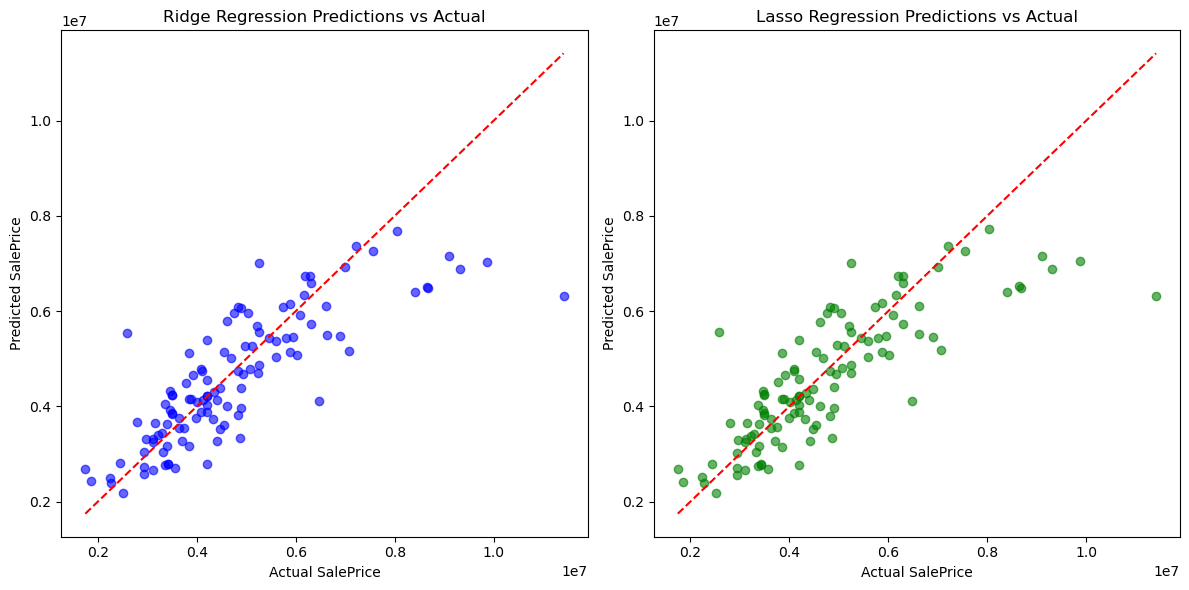

In [31]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_val, ridge_predictions, alpha=0.6, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.title('Ridge Regression Predictions vs Actual')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')


plt.subplot(1, 2, 2)
plt.scatter(y_val, lasso_predictions, alpha=0.6, color='green')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.title('Lasso Regression Predictions vs Actual')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.tight_layout()
plt.show()

In [32]:
ridge_predictions_test = ridge.predict(X_test_processed)
lasso_predictions_test = lasso.predict(X_test_processed)


predictions = pd.DataFrame({
    'Ridge Predictions': ridge_predictions_test,
    'Lasso Predictions': lasso_predictions_test
})

print(predictions)
predictions.to_csv('HousePricePredictions_test.csv', index=False)

print("Predictions on the test data saved to HousePricePredictions_test.csv.")

     Ridge Predictions  Lasso Predictions
0         5.379462e+06       5.373311e+06
1         7.179120e+06       7.191636e+06
2         3.152076e+06       3.149324e+06
3         4.444091e+06       4.445768e+06
4         3.285990e+06       3.282200e+06
..                 ...                ...
159       3.547082e+06       3.532374e+06
160       4.010650e+06       4.008510e+06
161       7.162307e+06       7.161770e+06
162       5.418793e+06       5.413768e+06
163       5.265672e+06       5.261007e+06

[164 rows x 2 columns]
Predictions on the test data saved to HousePricePredictions_test.csv.


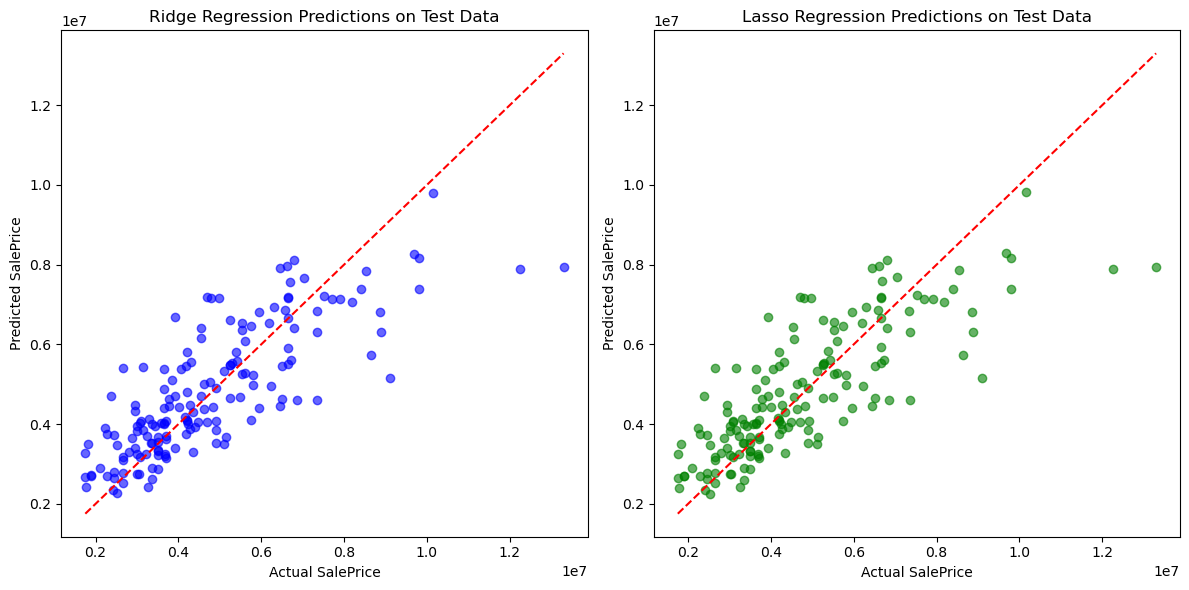

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_predictions_test, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Ridge Regression Predictions on Test Data')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')


plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_predictions_test, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Lasso Regression Predictions on Test Data')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')

plt.tight_layout()
plt.show()
